In [1]:
from IPython.display import display, Image, Audio

import cv2
import base64
import time
from openai import OpenAI
import os
# import requests

client = OpenAI()


60.0 Total video fps
289 frames read, at 0.25s intervals


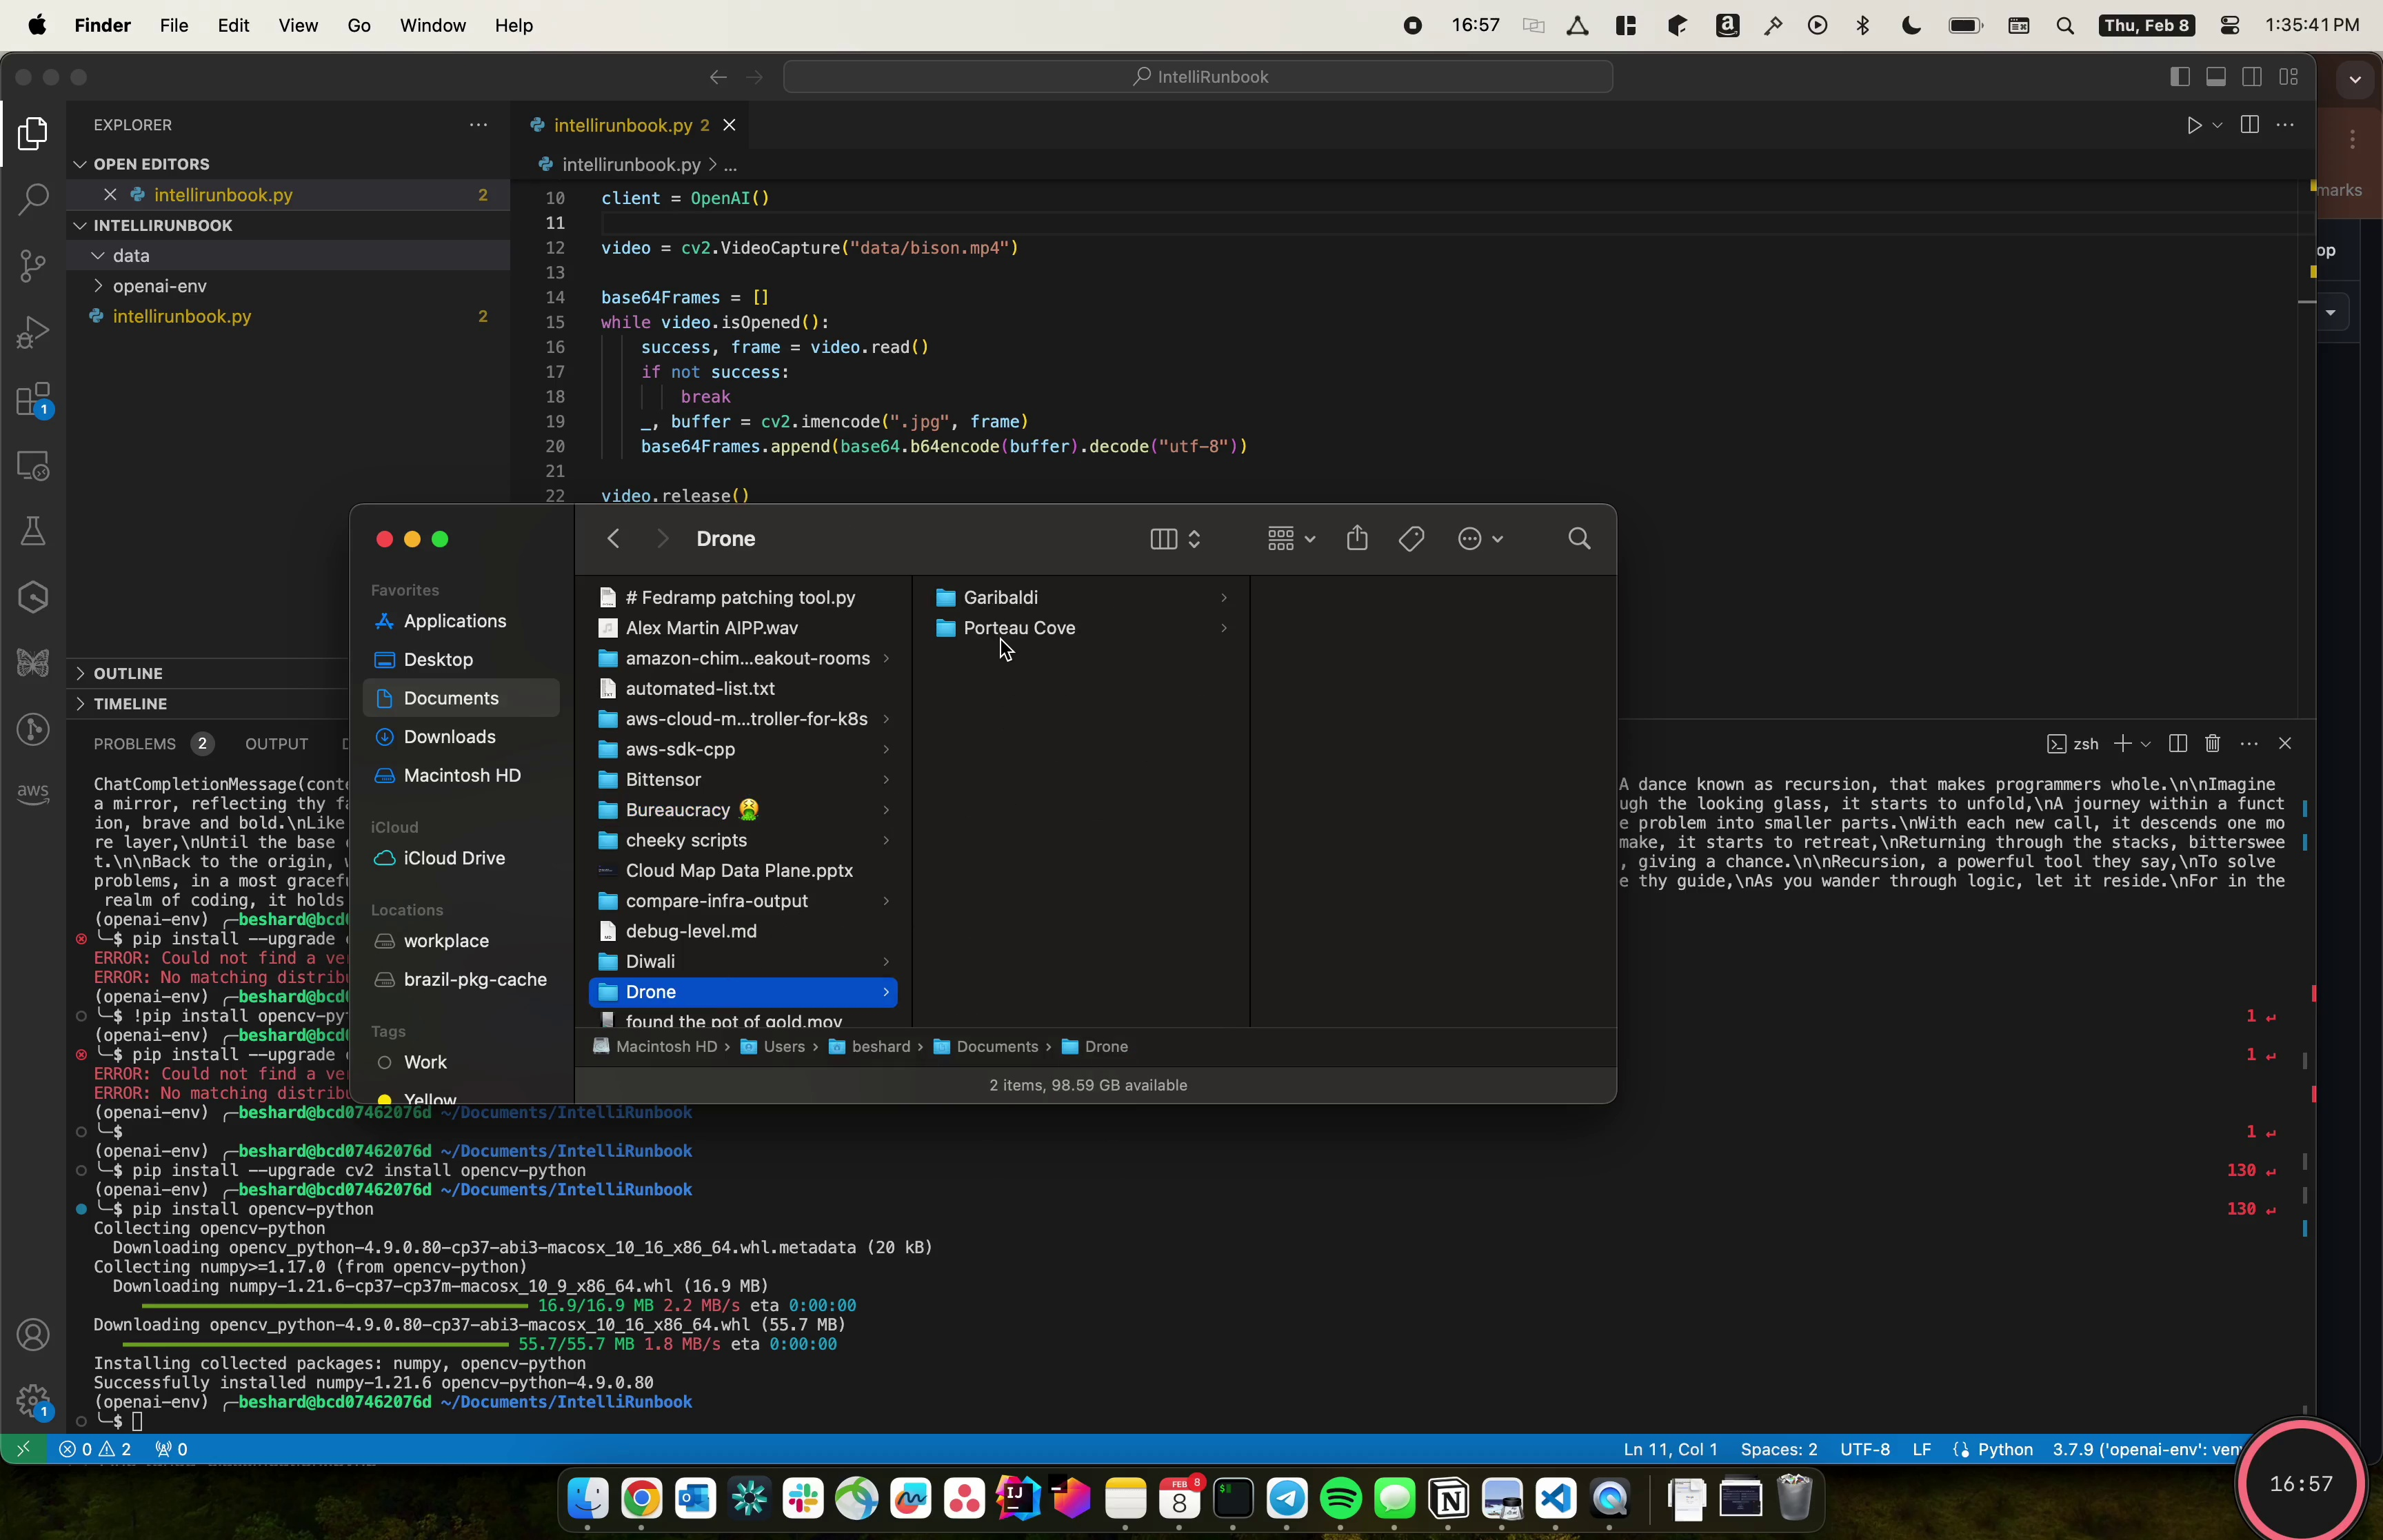

In [2]:
video = cv2.VideoCapture("data/crop-photo.mp4")

base64Frames = []

fps = video.get(cv2.CAP_PROP_FPS)
interval = 0.25
frame_count, frames_to_skip = 0, int(fps * interval)
print(fps, "Total video fps")

while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    if frame_count % frames_to_skip == 0:
        _, buffer = cv2.imencode(".jpg", frame)
        base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
    frame_count += 1

video.release()
print(len(base64Frames), "frames read, at "+ str(interval) + "s intervals")

display_handle = display(None, display_id=True)
for img in base64Frames[:50]:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)


In [4]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames of a video taken by an engineer that wants to capture his work. Describe what the engineer \
                did in a runbook so that another engineer can mimic their actions. The runbook should contain headings of sections and clear steps to replicate.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::25]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 2000
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)


Based on the provided images, it appears the engineer is demonstrating a process of taking a screenshot of three individuals standing outside in a snowy location, cropping the image, and creating a screen recording of this process using the QuickTime Player application on a macOS system. Below is the runbook with detailed steps to replicate this process:

# Engineer's Runbook for Image Processing and Screen Recording

## Overview
This procedure demonstrates how to capture an image, edit it to focus on specific content, and create a video recording of the process using macOS built-in tools.

## Requirements
- macOS computer
- QuickTime Player application
- Image file to be edited

## Part 1: Image Processing in Preview

### 1. Open Image
- Locate the image file in Finder.
- Double-click the image to open it in Preview.

### 2. Crop Image
- Click and drag to select the area of the image you wish to keep.
- Go to the menu bar, select `Tools`, and then `Crop` (or use the keyboard shortcut 